In [77]:
import datetime
print(datetime.datetime.now())
import sys
print(sys.executable)

2025-09-08 21:54:08.558185
c:\Users\Owner\Documents\GitProjects\Imbalanced_Classification\venv\Scripts\python.exe


# Step 0: Import library

In [78]:
import pandas as pd
import kagglehub

import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold
from sklearn.metrics import roc_auc_score, classification_report, precision_recall_curve
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE, SMOTENC
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from collections import Counter
import numpy as np
import pandas as pd

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    precision_recall_curve, auc
)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# xgboost
from xgboost import XGBClassifier

# imblearn
from imblearn.over_sampling import SMOTE, SMOTENC
from imblearn.pipeline import Pipeline as ImbPipeline


# Step 1: Load DATASET

In [79]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

# print("Path to dataset files:", path)

In [80]:
df_raw=pd.read_csv(r"C:\Users\Owner\Documents\GitProjects\Imbalanced_Classification\creditcard.csv")
 

In [81]:
df_raw.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Step 2: EDA

In [82]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [83]:
df_raw.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [84]:
df_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.175161e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.384974e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.094852e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,1.021879e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.494498e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.620335e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.149614e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.414189e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


No response: 284315
Has response: 492
training_data_pos_scale_weight: 577.8760162601626


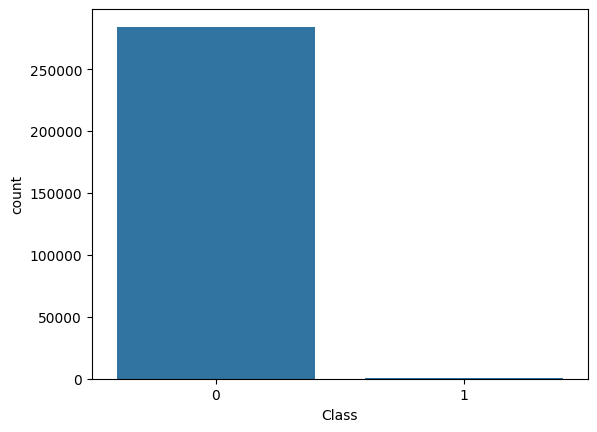

In [85]:
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
target_feature='Class'
def get_target_skew_rate(data_target):
    target_df = pd.DataFrame(data_target)
    sns.countplot(x=target_feature, data=target_df)

    no_renew_count = len(target_df[target_df[target_feature]==0])
    yes_renew_count = len(target_df[target_df[target_feature]==1])
    print(f"No response: {no_renew_count}")
    print(f"Has response: {yes_renew_count}")

    # save this for later...
    training_data_pos_scale_weight = (no_renew_count / yes_renew_count)
    print(f"training_data_pos_scale_weight: {training_data_pos_scale_weight}")
    return training_data_pos_scale_weight

training_data_pos_scale_weight = get_target_skew_rate(df_raw[target_feature])

<Axes: xlabel='Class', ylabel='Amount'>

(0.0, 500.0)

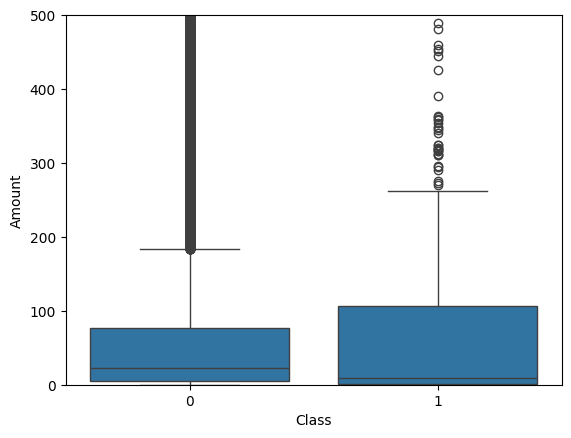

In [86]:
import seaborn as sns

sns.boxplot(x='Class', y='Amount', data=df_raw)
plt.ylim(0, 500)   # 裁剪掉极端值，方便看分布




Median: Class 0 has a higher typical (central) Amount.

Spread: Class 1 covers a broader range, with larger values and more high-end observations.

Business meaning :
 

fraudulent transactions (Class 1) tend to be associated with larger amounts and more extreme values.

C:\Users\Owner\AppData\Local\Temp\ipykernel_31364\71125959.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_raw[df_raw['Class']==0]['Time'], label="Non-Fraud", shade=True)


<Axes: xlabel='Time', ylabel='Density'>

C:\Users\Owner\AppData\Local\Temp\ipykernel_31364\71125959.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_raw[df_raw['Class']==1]['Time'], label="Fraud", shade=True)


<Axes: xlabel='Time', ylabel='Density'>

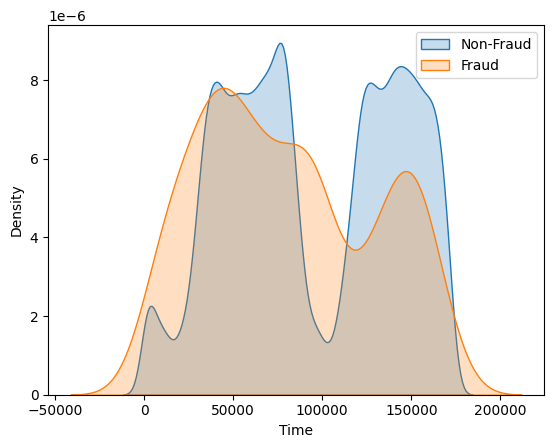

In [87]:
sns.kdeplot(df_raw[df_raw['Class']==0]['Time'], label="Non-Fraud", shade=True)
sns.kdeplot(df_raw[df_raw['Class']==1]['Time'], label="Fraud", shade=True)
plt.legend()


Different peaks (modes):

Both groups have multiple peaks, but their locations differ.

Fraudulent transactions (orange) peak earlier (lower Time values), while non-fraudulent (blue) have strong peaks at different ranges.

Overlap:

There’s a lot of overlap between Fraud and Non-Fraud distributions, but they aren’t identical.

This overlap tells you that Time alone is not enough to perfectly separate Fraud vs. Non-Fraud, but it carries some predictive signal.

Potential business insight:

If Time = time of day or sequence index, this suggests fraud transactions tend to cluster in different time ranges compared to normal ones.

For fraud detection, this could be an important feature when combined with others.

In [106]:
# fraud = df_raw[df_raw['Class']==1]
# nonfraud = df_raw[df_raw['Class']==0].sample(5000, random_state=42)  

# for col in [f"V{i}" for i in range(1, 29)]:
#     sns.kdeplot(nonfraud[col], label="Non-Fraud", shade=True)
#     sns.kdeplot(fraud[col], label="Fraud", shade=True)
#     plt.title(col)
#     plt.legend()
#     plt.show()


<Figure size 1200x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Heatmap')

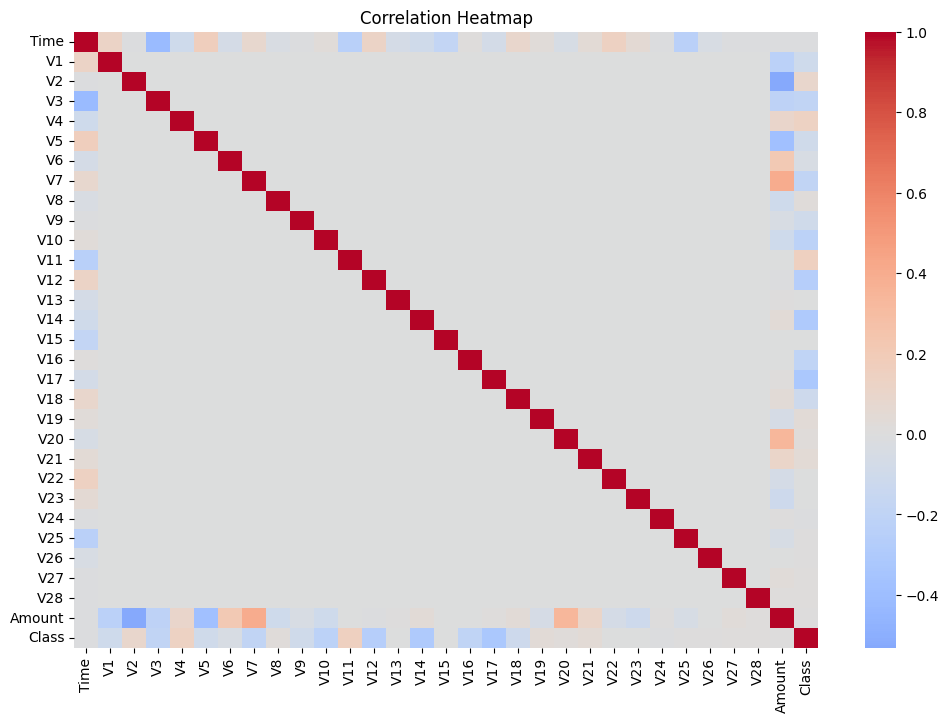

In [89]:
corr = df_raw.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()


In [90]:
corr_target = corr['Class'].sort_values(ascending=False)
print(corr_target)


Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64


# Step 3: Preprocessing

In [91]:
X = df_raw.drop(columns=target_feature)
y = df_raw[target_feature]


num_cols = [c for c in X.columns if c != "Class"] 
cat_cols = []


In [92]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)



SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Set the target ratio: minority class size = majority class size × 0.3
smote = SMOTE(sampling_strategy=0.3, random_state=42)

X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", Counter(y_train))
print("After SMOTE :", Counter(y_train_res))


Before SMOTE: Counter({0: 227451, 1: 394})
After SMOTE : Counter({0: 227451, 1: 68235})


In [95]:
# ===== 1) Pre-processing before One-Hot Encoding (for SMOTENC)=====
num_tf_nc = Pipeline([
    ("imp", SimpleImputer(strategy="median")),
    
])

cat_tf_nc = Pipeline([
    ("imp", SimpleImputer(strategy="most_frequent")),
    ("ord", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1))
])

# Ensure output order: numeric features first, categorical features later — this makes it easier to compute categorical column indices
preproc_nc = ColumnTransformer([
    ("num", num_tf_nc, num_cols),
    ("cat", cat_tf_nc, cat_cols)
], verbose_feature_names_out=False)

# ===== 2) Compute categorical_features indices for SMOTENC =====
# According to the ColumnTransformer order: first len(num_cols) are numeric, 
# followed by categorical columns
num_idx = list(range(len(num_cols)))
cat_idx = list(range(len(num_cols), len(num_cols) + len(cat_cols)))

# ===== 3) Post-processing: Only for LogReg/SVM (OHE + Standardization) =====
# Note: The ColumnTransformer here accepts "column indices"
postproc_lin = ColumnTransformer([
    ("num", StandardScaler(with_mean=True), num_idx),
    ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_idx)
], remainder="drop")


In [96]:
# Estimate the ratio using only the training set (to avoid data leakage)

pos = (y_train == 1).sum()
neg = (y_train == 0).sum()
spw = neg / max(pos, 1)   # Positive class weight = Negative samples / Positive samples
print("scale_pos_weight =", spw)


scale_pos_weight = 577.2868020304569


# Step 4: Model Baseline 

xgboost


In [104]:
RANDOM_STATE = 42
TARGET_RATIO = 0.3  
# 2) Prepare for SMOTE: use preproc_nc to map the data into a numeric space compatible with SMOTE
X_train_smote_space = preproc_nc.fit_transform(X_train, y_train)  # only fit train dataset
X_test_smote_space  = preproc_nc.transform(X_test)

# # 3) SMOTE (use SMOTENC if categorical features exist, otherwise plain SMOTE)
if len(cat_idx) > 0:
    smote = SMOTENC(
        categorical_features=cat_idx,
        sampling_strategy=TARGET_RATIO,
        random_state=RANDOM_STATE,
        k_neighbors=5
    )
else:
    smote = SMOTE(
        sampling_strategy=TARGET_RATIO,
        random_state=RANDOM_STATE,
        k_neighbors=5
    )

X_train_res, y_train_res = smote.fit_resample(X_train_smote_space, y_train)
print("Train class AFTER :", Counter(y_train_res))

Train class AFTER : Counter({0: 227451, 1: 68235})


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.9
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'



==== XGBoost Results ====
Accuracy: 0.999403
Classification Report:
               precision    recall  f1-score   support

           0     0.9998    0.9996    0.9997     56864
           1     0.8077    0.8571    0.8317        98

    accuracy                         0.9994     56962
   macro avg     0.9037    0.9284    0.9157     56962
weighted avg     0.9994    0.9994    0.9994     56962



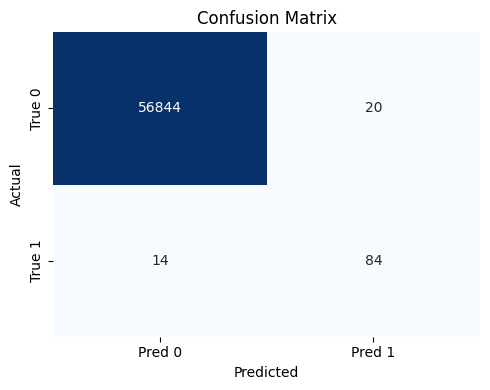

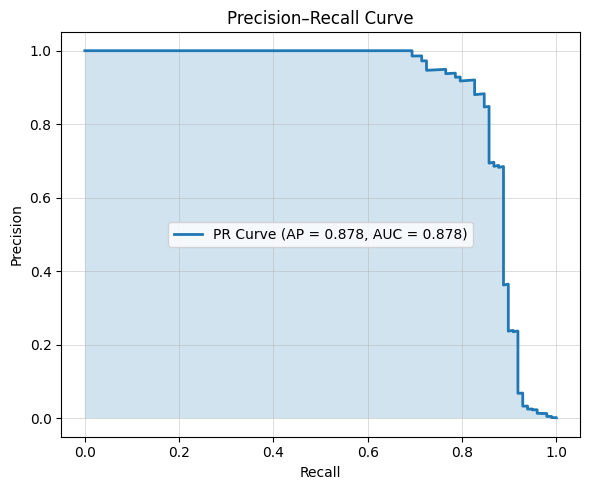

PR-AUC: 0.877526
Average Precision (AP): 0.877674


In [ ]:
from sklearn.metrics import average_precision_score

X_train_final = X_train_res ##preprocessing and smote
X_test_final  = X_test_smote_space ##preprocessing 

# 5) training XGBoost
xgb = XGBClassifier(
    n_estimators=300, max_depth=6, learning_rate=0.1,
    subsample=0.9, colsample_bytree=0.9,
    tree_method="hist",  # GPU to change, "gpu_hist"
    eval_metric="logloss", n_jobs=-1, random_state=RANDOM_STATE
)
xgb.fit(X_train_final, y_train_res)

# 6) evaluation: Accuracy / Confusion Matrix / Classification Report / PR-AUC
y_pred  = xgb.predict(X_test_final)
y_score = xgb.predict_proba(X_test_final)[:, 1]

# ===== 1) evaluation metrics =====
def print_classification_results(y_true, y_pred, y_score, model_name="Model", class_names=("0","1")):
    acc = accuracy_score(y_true, y_pred)
    cr  = classification_report(y_true, y_pred, target_names=class_names, digits=4)

    print(f"\n==== {model_name} Results ====")
    print(f"Accuracy: {acc:.6f}")
    print("Classification Report:\n", cr)

    return acc, cr


# ===== 2) plot_confusion_matrix =====
def plot_confusion_matrix(y_true, y_pred, class_names=("0","1"), figsize=(5,4)):
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=figsize)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=[f"Pred {class_names[0]}", f"Pred {class_names[1]}"],
                yticklabels=[f"True {class_names[0]}", f"True {class_names[1]}"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.tight_layout()
    plt.show()

    return cm


# ===== 3) Precision–Recall curve =====
def plot_precision_recall(y_true, y_score, figsize=(6,5), show_grid=True):
    precision_curve, recall_curve, thresholds = precision_recall_curve(y_true, y_score)
    ap     = average_precision_score(y_true, y_score)
    pr_auc = auc(recall_curve, precision_curve)

    plt.figure(figsize=figsize)
    plt.plot(recall_curve, precision_curve, linewidth=2,
             label=f"PR Curve (AP = {ap:.3f}, AUC = {pr_auc:.3f})")
    plt.fill_between(recall_curve, precision_curve, alpha=0.2)

    if show_grid:
        plt.grid(True, linewidth=0.5, alpha=0.6)

    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision–Recall Curve")
    plt.legend()
    plt.tight_layout()
    plt.show()

    print(f"PR-AUC: {pr_auc:.6f}")
    print(f"Average Precision (AP): {ap:.6f}")

    return precision_curve, recall_curve, thresholds, ap, pr_auc


# 1) print basic metrics
acc, cr = print_classification_results(y_test, y_pred, y_score,
                                       model_name="XGBoost",
                                       class_names=("0","1"))

# 2) plot_confusion_matrix
cm = plot_confusion_matrix(y_test, y_pred, class_names=("0","1"))

# 3) plot_precision_recall
precision_curve, recall_curve, thresholds, ap, pr_auc = plot_precision_recall(y_test, y_score)







Random Forest

,n_estimators,300
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False



==== Random Forest Results ====
Accuracy: 0.999508
Classification Report:
               precision    recall  f1-score   support

   Non-churn     0.9998    0.9998    0.9998     56864
       Churn     0.8571    0.8571    0.8571        98

    accuracy                         0.9995     56962
   macro avg     0.9284    0.9284    0.9284     56962
weighted avg     0.9995    0.9995    0.9995     56962



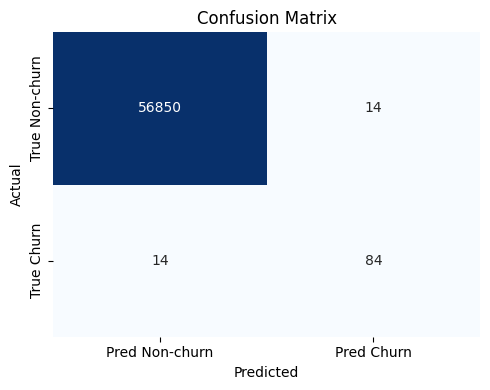

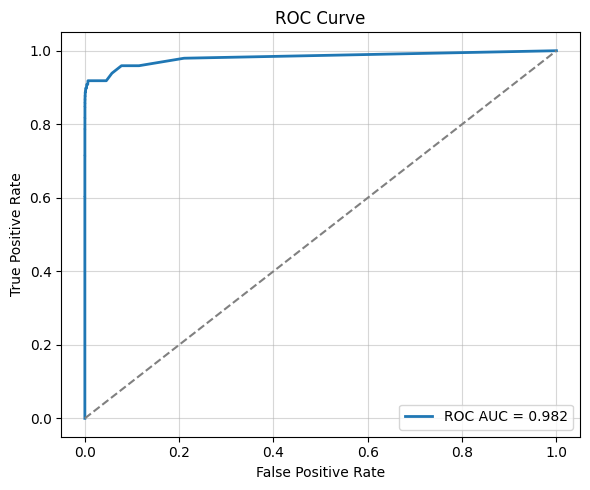

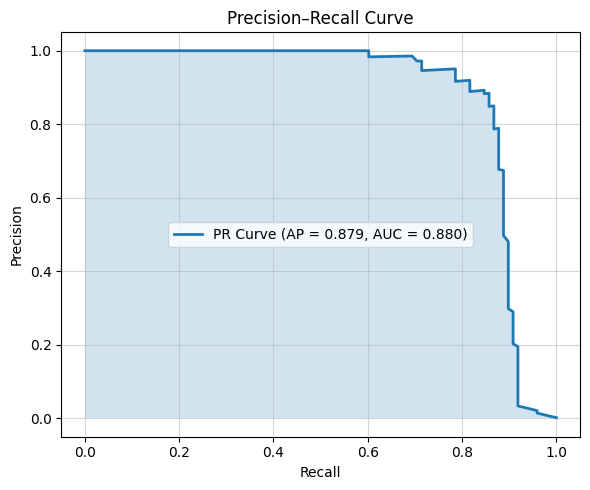

PR-AUC: 0.879548
Average Precision (AP): 0.879146


In [105]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# train model 
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    n_jobs=-1,
    random_state=RANDOM_STATE,
    class_weight=None  # already SMOTE 
)
rf.fit(X_train_res, y_train_res)

# prediction 
y_pred  = rf.predict(X_test_smote_space)
y_score = rf.predict_proba(X_test_smote_space)[:, 1]

 


# ===== 2) basic matirx=====
def print_classification_results(y_true, y_pred, y_score, model_name="Random Forest", class_names=("0","1")):
    acc = accuracy_score(y_true, y_pred)
    cr  = classification_report(y_true, y_pred, target_names=class_names, digits=4)
    print(f"\n==== {model_name} Results ====")
    print(f"Accuracy: {acc:.6f}")
    print("Classification Report:\n", cr)
    return acc, cr


# ===== 3)confusion matrix=====
def plot_confusion_matrix(y_true, y_pred, class_names=("0","1"), figsize=(5,4)):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=figsize)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=[f"Pred {c}" for c in class_names],
                yticklabels=[f"True {c}" for c in class_names])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.tight_layout()
    plt.show()
    return cm


# ===== 4) ROC  =====
def plot_roc_curve(y_true, y_score, figsize=(6,5)):
    fpr, tpr, _ = roc_curve(y_true, y_score)
    roc_auc = roc_auc_score(y_true, y_score)

    plt.figure(figsize=figsize)
    plt.plot(fpr, tpr, linewidth=2, label=f"ROC AUC = {roc_auc:.3f}")
    plt.plot([0,1],[0,1],"--",color="gray")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.grid(True, alpha=0.5)
    plt.tight_layout()
    plt.show()
    return roc_auc


# ===== 5) Precision–Recall   =====
def plot_precision_recall(y_true, y_score, figsize=(6,5)):
    precision_curve, recall_curve, thresholds = precision_recall_curve(y_true, y_score)
    ap     = average_precision_score(y_true, y_score)
    pr_auc = auc(recall_curve, precision_curve)

    plt.figure(figsize=figsize)
    plt.plot(recall_curve, precision_curve, linewidth=2,
             label=f"PR Curve (AP = {ap:.3f}, AUC = {pr_auc:.3f})")
    plt.fill_between(recall_curve, precision_curve, alpha=0.2)
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision–Recall Curve")
    plt.legend()
    plt.grid(True, alpha=0.5)
    plt.tight_layout()
    plt.show()

    print(f"PR-AUC: {pr_auc:.6f}")
    print(f"Average Precision (AP): {ap:.6f}")
    return ap, pr_auc







# 3) print basic metrics
acc, cr = print_classification_results(y_test, y_pred, y_score,
                                       model_name="Random Forest",
                                       class_names=("Non-churn","Churn"))


cm = plot_confusion_matrix(y_test, y_pred, class_names=("Non-churn","Churn"))

 
roc_auc = plot_roc_curve(y_test, y_score)

 
ap, pr_auc = plot_precision_recall(y_test, y_score)



logistic model

In [74]:

# 2) 用你的 preproc_nc 把数据映射到“可做 SMOTE 的数值空间”
X_train_smote_space = preproc_nc.fit_transform(X_train, y_train)  # 只在训练集 fit
X_test_smote_space  = preproc_nc.transform(X_test)

# 3) SMOTE / SMOTENC（按是否有类别列）
if len(cat_idx) > 0:
    smote = SMOTENC(
        categorical_features=cat_idx,
        sampling_strategy=TARGET_RATIO,
        random_state=RANDOM_STATE,
        k_neighbors=5
    )
else:
    smote = SMOTE(
        sampling_strategy=TARGET_RATIO,
        random_state=RANDOM_STATE,
        k_neighbors=5
    )

X_train_res, y_train_res = smote.fit_resample(X_train_smote_space, y_train)
print("Train AFTER  SMOTE:", Counter(y_train_res))

# 4) 线性模型后置（在 SMOTE 之后）：标准化 + OHE
X_train_lin = postproc_lin.fit_transform(X_train_res, y_train_res)
X_test_lin  = postproc_lin.transform(X_test_smote_space)

# 5) 训练 Logistic Regression（用 SAGA，适合大规模+稀疏）
logit = LogisticRegression(
    solver="saga",
    max_iter=2000,
    random_state=RANDOM_STATE
    # 用了 SMOTE，一般不再加 class_weight="balanced"
)
logit.fit(X_train_lin, y_train_res)

# 6) 测试集评估
y_pred  = logit.predict(X_test_lin)
y_score = logit.predict_proba(X_test_lin)[:, 1]

acc = accuracy_score(y_test, y_pred)
cm  = confusion_matrix(y_test, y_pred)
cr  = classification_report(y_test, y_pred, digits=3)

# ROC-AUC & PR-AUC(AP)
roc_auc = roc_auc_score(y_test, y_score)
ap_auc  = average_precision_score(y_test, y_score)

# （可选）几何积分方式的 PR-AUC，与 AP 略有差别
prec_curve, recall_curve, _ = precision_recall_curve(y_test, y_score)
pr_auc_geom = auc(recall_curve, prec_curve)

print("\n==== Logistic Regression (Test) ====")
print(f"Accuracy: {acc:.6f} | ROC-AUC: {roc_auc:.6f} | PR-AUC(AP): {ap_auc:.6f} | PR-AUC(geom): {pr_auc_geom:.6f}")
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", cr)

# 7) 训练集 AUC（基于“原始训练集”，更能反映泛化差距）
X_train_lin_orig = postproc_lin.transform(X_train_smote_space)
y_score_tr = logit.predict_proba(X_train_lin_orig)[:, 1]
roc_auc_tr = roc_auc_score(y_train, y_score_tr)
ap_auc_tr  = average_precision_score(y_train, y_score_tr)

print("\n==== Logistic Regression (Train on ORIGINAL TRAIN SET) ====")
print(f"ROC-AUC: {roc_auc_tr:.6f} | PR-AUC(AP): {ap_auc_tr:.6f}")

Train AFTER  SMOTE: Counter({0: 227451, 1: 68235})


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'saga'
,max_iter,2000
,multi_class,'deprecated'



==== Logistic Regression (Test) ====
Accuracy: 0.996068 | ROC-AUC: 0.975645 | PR-AUC(AP): 0.720668 | PR-AUC(geom): 0.765458
Confusion Matrix:
 [[56651   213]
 [   11    87]]
Classification Report:
               precision    recall  f1-score   support

           0      1.000     0.996     0.998     56864
           1      0.290     0.888     0.437        98

    accuracy                          0.996     56962
   macro avg      0.645     0.942     0.718     56962
weighted avg      0.999     0.996     0.997     56962


==== Logistic Regression (Train on ORIGINAL TRAIN SET) ====
ROC-AUC: 0.987838 | PR-AUC(AP): 0.757225


svm

In [75]:

# 2) 用 preproc_nc 把数据映射到“可做 SMOTE 的数值空间”
X_train_smote_space = preproc_nc.fit_transform(X_train, y_train)  # 只在训练集 fit
X_test_smote_space  = preproc_nc.transform(X_test)

# 3) SMOTE / SMOTENC（按是否有类别列）
if len(cat_idx) > 0:
    smote = SMOTENC(
        categorical_features=cat_idx,
        sampling_strategy=TARGET_RATIO,
        random_state=RANDOM_STATE,
        k_neighbors=5
    )
else:
    smote = SMOTE(
        sampling_strategy=TARGET_RATIO,
        random_state=RANDOM_STATE,
        k_neighbors=5
    )

X_train_res, y_train_res = smote.fit_resample(X_train_smote_space, y_train)
print("Train AFTER  SMOTE:", Counter(y_train_res))

# 4) 线性模型后置（在 SMOTE 之后）：标准化 + OHE
X_train_lin = postproc_lin.fit_transform(X_train_res, y_train_res)
X_test_lin  = postproc_lin.transform(X_test_smote_space)

# 5) 训练 SVM（RBF）。probability=False 更快；用 decision_function 计算 AUC/PR-AUC
svc = SVC(kernel="rbf", probability=False, random_state=RANDOM_STATE)
svc.fit(X_train_lin, y_train_res)

# 6) 测试集评估
y_pred  = svc.predict(X_test_lin)
y_score = svc.decision_function(X_test_lin)  # 连续分数

acc = accuracy_score(y_test, y_pred)
cm  = confusion_matrix(y_test, y_pred)
cr  = classification_report(y_test, y_pred, digits=3)

# ROC-AUC & PR-AUC(AP)
roc_auc = roc_auc_score(y_test, y_score)
ap_auc  = average_precision_score(y_test, y_score)

# （可选）几何积分方式 PR-AUC（与 AP 略有差异）
prec_curve, recall_curve, _ = precision_recall_curve(y_test, y_score)
pr_auc_geom = auc(recall_curve, prec_curve)

print("\n==== SVM (RBF) - Test ====")
print(f"Accuracy: {acc:.6f} | ROC-AUC: {roc_auc:.6f} | PR-AUC(AP): {ap_auc:.6f} | PR-AUC(geom): {pr_auc_geom:.6f}")
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", cr)

# 7) 训练集 AUC（基于“原始训练集”，更能反映泛化差距）
X_train_lin_orig = postproc_lin.transform(X_train_smote_space)
y_score_tr = svc.decision_function(X_train_lin_orig)
roc_auc_tr = roc_auc_score(y_train, y_score_tr)
ap_auc_tr  = average_precision_score(y_train, y_score_tr)

print("\n==== SVM (RBF) - Train on ORIGINAL TRAIN SET ====")
print(f"ROC-AUC: {roc_auc_tr:.6f} | PR-AUC(AP): {ap_auc_tr:.6f}")

Train AFTER  SMOTE: Counter({0: 227451, 1: 68235})


,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False



==== SVM (RBF) - Test ====
Accuracy: 0.998543 | ROC-AUC: 0.975530 | PR-AUC(AP): 0.683820 | PR-AUC(geom): 0.681679
Confusion Matrix:
 [[56798    66]
 [   17    81]]
Classification Report:
               precision    recall  f1-score   support

           0      1.000     0.999     0.999     56864
           1      0.551     0.827     0.661        98

    accuracy                          0.999     56962
   macro avg      0.775     0.913     0.830     56962
weighted avg      0.999     0.999     0.999     56962


==== SVM (RBF) - Train on ORIGINAL TRAIN SET ====
ROC-AUC: 0.999360 | PR-AUC(AP): 0.846848


CV+ Compare baseline models


# Step 5: random search cross validation Model comparation 

In [76]:
# ================== Pick Two Models: CV + Threshold Tuning + Test Eval ==================
from collections import Counter
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import (
    average_precision_score, roc_auc_score, precision_recall_curve,
    confusion_matrix, classification_report, accuracy_score
)
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE, SMOTENC

# ---------- 基本设置 ----------
RANDOM_STATE = 42
TARGET_RATIO = 0.3   # SMOTE 目标：少数类≈多数类的30%（约1:3）
N_SPLITS_MAX = 5     # CV 最大折数
N_ITER_RF   = 12     # RF 随机搜索迭代
N_ITER_XGB  = 20     # XGB 随机搜索迭代

# ---------- 工具函数 ----------
def make_sampler(cat_idx, ratio=TARGET_RATIO, random_state=RANDOM_STATE):
    if cat_idx and len(cat_idx) > 0:
        return SMOTENC(categorical_features=cat_idx, sampling_strategy=ratio,
                       random_state=random_state, k_neighbors=5)
    return SMOTE(sampling_strategy=ratio, random_state=random_state, k_neighbors=5)

def robust_ap_scorer(y_true, y_score):
    """验证折若只有单一类别，则返回0，避免 NaN 使CV失效。"""
    y_true = np.asarray(y_true)
    return 0.0 if len(np.unique(y_true)) < 2 else average_precision_score(y_true, y_score)

def build_pipes(preproc_nc, cat_idx):
    sampler = make_sampler(cat_idx)
    rf_pipe = ImbPipeline([
        ("preproc", preproc_nc),
        ("smote", sampler),
        ("clf", RandomForestClassifier(random_state=RANDOM_STATE, n_jobs=-1))
    ])
    xgb_pipe = ImbPipeline([
        ("preproc", preproc_nc),
        ("smote", sampler),
        ("clf", XGBClassifier(
            eval_metric="logloss", tree_method="hist", n_jobs=-1, random_state=RANDOM_STATE
        ))
    ])
    return rf_pipe, xgb_pipe

def param_spaces():
    rf = {
        "clf__n_estimators": [150, 300, 500],
        "clf__max_depth": [None, 10, 16, 24],
        "clf__min_samples_split": [2, 5, 10],
        "clf__min_samples_leaf": [1, 2, 4],
        "clf__max_features": ["sqrt", "log2", 0.5, 0.8],
    }
    xgb = {
        "clf__n_estimators": [200, 300, 500, 700],
        "clf__max_depth": [3, 4, 6, 8],
        "clf__learning_rate": [0.03, 0.05, 0.1],
        "clf__subsample": [0.8, 0.9, 1.0],
        "clf__colsample_bytree": [0.8, 0.9, 1.0],
        "clf__min_child_weight": [1, 3, 5],
        "clf__gamma": [0, 0.5, 1.0],
        "clf__reg_lambda": [0.8, 1.0, 1.5, 2.0],
    }
    return rf, xgb

def pick_threshold_by_val(fitted_pipe, X_train, y_train, *, mode="f1", min_precision=0.9):
    """
    在训练集中再留一小块验证集挑阈值，避免用测试集调参。
    mode="f1"：选 F1 最大；
    mode="precision_at"：在 precision>=min_precision 下，recall 最大。
    返回：最佳阈值 best_thr
    """
    X_tr2, X_val, y_tr2, y_val = train_test_split(
        X_train, y_train, stratify=y_train, test_size=0.2, random_state=RANDOM_STATE
    )
    # 先在训练子集上拟合
    fitted_pipe.fit(X_tr2, y_tr2)
    # 拿到验证集概率分数（RF/XGB皆有predict_proba）
    y_score = fitted_pipe.predict_proba(X_val)[:, 1]
    p, r, thr = precision_recall_curve(y_val, y_score)

    if mode == "precision_at":
        mask = p[:-1] >= float(min_precision)
        if mask.any():
            idx = np.argmax(r[:-1][mask])
            return thr[mask][idx]
        # 若无点满足精度要求，退化为F1最大
    # F1最大
    f1 = 2 * p * r / (p + r + 1e-12)
    return thr[np.nanargmax(f1[:-1])] if len(thr) > 0 else 0.5

def evaluate_on_test(pipe, X_train, y_train, X_test, y_test, threshold):
    """在测试集用给定阈值评估，并返回一行指标 + 详细字典"""
    # 最终用全训练集拟合（不含阈值调优用的那块）
    pipe.fit(X_train, y_train)
    y_prob = pipe.predict_proba(X_test)[:, 1]
    y_pred = (y_prob >= threshold).astype(int)

    ap  = average_precision_score(y_test, y_prob)
    roc = roc_auc_score(y_test, y_prob)
    acc = accuracy_score(y_test, y_pred)
    cm  = confusion_matrix(y_test, y_pred)
    cr  = classification_report(y_test, y_pred, digits=3)

    row = {
        "Threshold": threshold,
        "PR_AUC_test": ap,
        "ROC_AUC_test": roc,
        "Accuracy": acc,
        "TP": cm[1,1], "FP": cm[0,1], "FN": cm[1,0], "TN": cm[0,0],
    }
    detail = {"ConfusionMatrix": cm, "ClassificationReport": cr}
    return row, detail

# ---------- 0) 外部分层切分（留出测试集） ----------
X_tr, X_te, y_tr, y_te = train_test_split(
    X, y.astype(int), stratify=y, test_size=0.3, random_state=RANDOM_STATE
)
print("Train counts:", Counter(y_tr), "| Test counts:", Counter(y_te))

# ---------- 1) 构建两条管道 ----------
rf_pipe, xgb_pipe = build_pipes(preproc_nc, cat_idx)

# ---------- 2) 自适应折数 & 稳健PR-AUC scorer ----------
pos_cnt = int((y_tr == 1).sum())
n_splits = max(2, min(N_SPLITS_MAX, pos_cnt))
cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=RANDOM_STATE)
print("CV n_splits:", n_splits)

# ---------- 3) 随机搜索（PR-AUC 打分，error_score=0 防止 NaN 终止） ----------
rf_params, xgb_params = param_spaces()

rf_search = RandomizedSearchCV(
    rf_pipe, rf_params, n_iter=N_ITER_RF, scoring=(
        lambda est, Xv, yv: robust_ap_scorer(yv, est.predict_proba(Xv)[:,1])
    ),
    cv=cv, random_state=RANDOM_STATE, n_jobs=-1, verbose=2, error_score=0.0, refit=True
)
xgb_search = RandomizedSearchCV(
    xgb_pipe, xgb_params, n_iter=N_ITER_XGB, scoring=(
        lambda est, Xv, yv: robust_ap_scorer(yv, est.predict_proba(Xv)[:,1])
    ),
    cv=cv, random_state=RANDOM_STATE, n_jobs=-1, verbose=2, error_score=0.0, refit=True
)

print("\n>>> Tuning RandomForest ...")
rf_search.fit(X_tr, y_tr)
print("Best RF AP (CV):", rf_search.best_score_)
print("Best RF params:", rf_search.best_params_)

print("\n>>> Tuning XGBoost ...")
xgb_search.fit(X_tr, y_tr)
print("Best XGB AP (CV):", xgb_search.best_score_)
print("Best XGB params:", xgb_search.best_params_)

# ---------- 4) 阈值调优（只用训练集做小验证，不看测试集） ----------
# 策略1：选 F1 最大；若你想要“Precision≥0.90”，改为 mode="precision_at", min_precision=0.90
rf_thr  = pick_threshold_by_val(rf_search.best_estimator_,  X_tr, y_tr, mode="f1")
xgb_thr = pick_threshold_by_val(xgb_search.best_estimator_, X_tr, y_tr, mode="f1")
print(f"\nPicked thresholds -> RF: {rf_thr:.4f} | XGB: {xgb_thr:.4f}")

# ---------- 5) 在测试集评估 ----------
rf_row, rf_detail   = evaluate_on_test(rf_search.best_estimator_,  X_tr, y_tr, X_te, y_te, rf_thr)
xgb_row, xgb_detail = evaluate_on_test(xgb_search.best_estimator_, X_tr, y_tr, X_te, y_te, xgb_thr)

summary = pd.DataFrame([
    {"Model": "RandomForest", **rf_row},
    {"Model": "XGBoost",      **xgb_row},
]).sort_values(["PR_AUC_test", "ROC_AUC_test"], ascending=False)

print("\n================ Summary (Test) ================")
print(summary.to_string(index=False))

print("\n==== RandomForest (Test) detail ====")
print("Confusion Matrix:\n", rf_detail["ConfusionMatrix"])
print("Classification Report:\n", rf_detail["ClassificationReport"])

print("\n==== XGBoost (Test) detail ====")
print("Confusion Matrix:\n", xgb_detail["ConfusionMatrix"])
print("Classification Report:\n", xgb_detail["ClassificationReport"])


Train counts: Counter({0: 199020, 1: 344}) | Test counts: Counter({0: 85295, 1: 148})
CV n_splits: 5

>>> Tuning RandomForest ...
Fitting 5 folds for each of 12 candidates, totalling 60 fits


,estimator,Pipeline(step...m_state=42))])
,param_distributions,"{'clf__max_depth': [None, 10, ...], 'clf__max_features': ['sqrt', 'log2', ...], 'clf__min_samples_leaf': [1, 2, ...], 'clf__min_samples_split': [2, 5, ...], ...}"
,n_iter,12
,scoring,<function <la...001B6191D7420>
,n_jobs,-1
,refit,True
,cv,StratifiedKFo... shuffle=True)
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,0.0


Best RF AP (CV): 0.8676777306736442
Best RF params: {'clf__n_estimators': 150, 'clf__min_samples_split': 5, 'clf__min_samples_leaf': 1, 'clf__max_features': 'log2', 'clf__max_depth': None}

>>> Tuning XGBoost ...
Fitting 5 folds for each of 20 candidates, totalling 100 fits


,estimator,"Pipeline(step...=None, ...))])"
,param_distributions,"{'clf__colsample_bytree': [0.8, 0.9, ...], 'clf__gamma': [0, 0.5, ...], 'clf__learning_rate': [0.03, 0.05, ...], 'clf__max_depth': [3, 4, ...], ...}"
,n_iter,20
,scoring,<function <la...001B60EC5B4C0>
,n_jobs,-1
,refit,True
,cv,StratifiedKFo... shuffle=True)
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,0.0


Best XGB AP (CV): 0.8658873157402965
Best XGB params: {'clf__subsample': 1.0, 'clf__reg_lambda': 1.0, 'clf__n_estimators': 200, 'clf__min_child_weight': 5, 'clf__max_depth': 8, 'clf__learning_rate': 0.1, 'clf__gamma': 0, 'clf__colsample_bytree': 0.8}

Picked thresholds -> RF: 0.5501 | XGB: 0.7321

================ Summary (Test) ================
       Model  Threshold  PR_AUC_test  ROC_AUC_test  Accuracy  TP  FP  FN    TN
     XGBoost   0.732139     0.838644      0.981122  0.999450 117  16  31 85279
RandomForest   0.550127     0.835855      0.960844  0.999473 120  17  28 85278

==== RandomForest (Test) detail ====
Confusion Matrix:
 [[85278    17]
 [   28   120]]
Classification Report:
               precision    recall  f1-score   support

           0      1.000     1.000     1.000     85295
           1      0.876     0.811     0.842       148

    accuracy                          0.999     85443
   macro avg      0.938     0.905     0.921     85443
weighted avg      0.999     0.9

# Step 5: Feature Selection

# Step 6: final model 